## EE559 Assignment 1 : Classification using KNN, Banknote Authentication Dataset

### @author : Suchismita Sahu, USCID : 7688176370

In [273]:
# Importing Libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
import math

%matplotlib inline

### 1(a) Importing the data and reading:

Attribute Information:
1. Variance of Wavelet Transformed Image (continuous) 
2. Skewness of Wavelet Transformed Image (continuous) 
3. Curtosis of Wavelet Transformed Image (continuous) 
4. Entropy of Image (continuous) 
5. Class (integer) 

In [225]:
# Reading the Data as a dataframe in Pandas
data = pd.read_csv('bank_note_data.csv')
#data.describe()
#data.head()
#data.corr()

### 1(b) Pre-Processing and Exploratory data analysis:
Here, we get our Input Data = Independent Variable as X by dropping the Last column which contains the Labels = Output Data or Y

In [226]:
# Separating Label from Data
Y = data.Class
#print (Y.shape)
X = data.drop('Class',axis = 1)
#print (X.shape)

### Data Visualization

[Text(0,0,'Forged Bank Note'), Text(0,0,'Authentic Bank Note')]

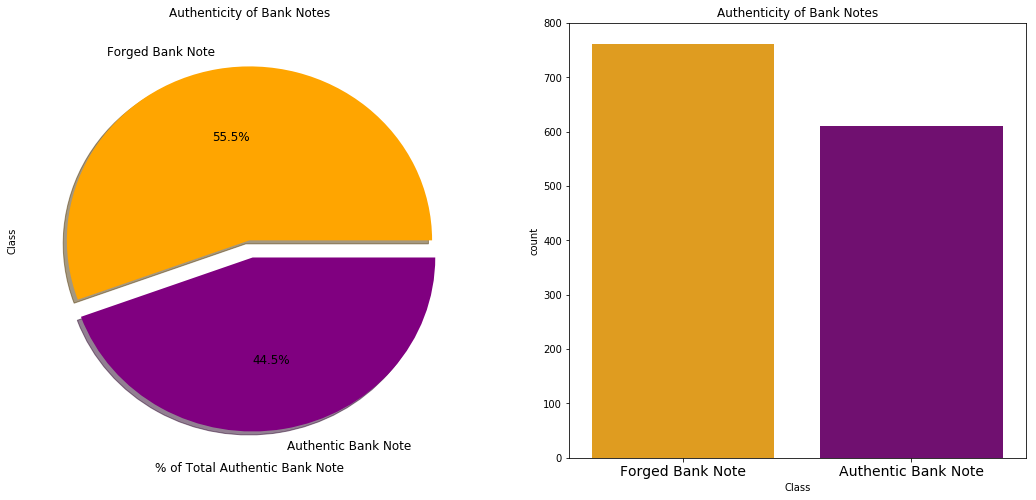

In [229]:
# Data Visualization - Pie-Plot `
f,ax=plt.subplots(1,2,figsize=(18,8))
colors=["orange", "purple"]
labels = 'Forged Bank Note', 'Authentic Bank Note'
ax[0].set_title('Authenticity of Bank Notes', fontsize=12)
ax[0].set_xlabel('% of Total Authentic Bank Note', fontsize=12)
Y.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=colors, labels=labels,fontsize=12)

# Count Plot for Class-Labels   
sns.countplot(x=Y, data=X, palette=colors, ax=ax[1])
ax[1].set_title('Authenticity of Bank Notes', fontsize=12)
ax[1].set_xticklabels(['Forged Bank Note', 'Authentic Bank Note'], fontsize=14)

### 1(b)(i) Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.
#### Scatterplot

Displaying Scatterplots of Independent Variables


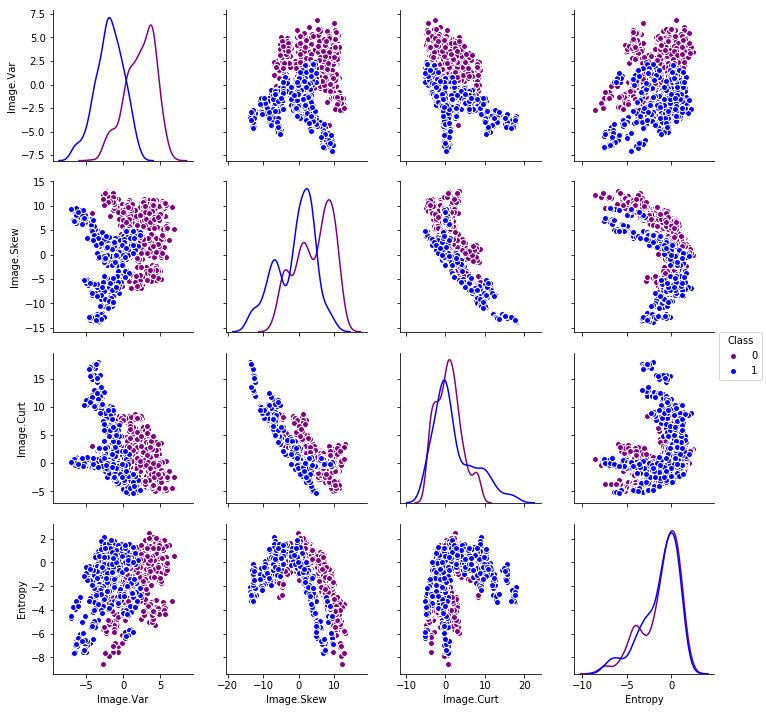

In [252]:
# Data Visualization - Scatterplots
colors = ['purple', 'blue']
print('Displaying Scatterplots of Independent Variables')
sns.pairplot(data=data, hue='Class', palette= colors, vars= ['Image.Var','Image.Skew','Image.Curt','Entropy'], diag_kind='kde')
# plt.title('Displaying Scatterplots of Independent Variables')

### 1(b)(ii) Make boxplots for each of the independent variables. Use color to show Classes 0 and 1.
#### Boxplots

Displaying Boxplot of Independent Variables


Text(0.5,1,'Boxplot of Entropy')

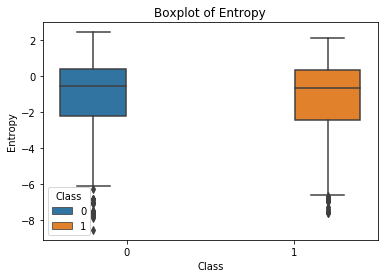

In [253]:
# Data Visualization - BoxPlots
print('Displaying Boxplot of Independent Variables')
sns.boxplot(data=data, hue='Class', y='Entropy', x='Class')
plt.title('Boxplot of Entropy')

Text(0.5,1,'Boxplot of Image Variance')

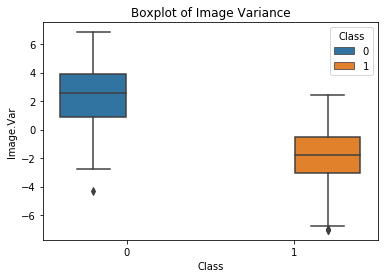

In [254]:
sns.boxplot(data=data, hue='Class', y='Image.Var', x='Class')    
plt.title('Boxplot of Image Variance')

Text(0.5,1,'Boxplot of Image Skew')

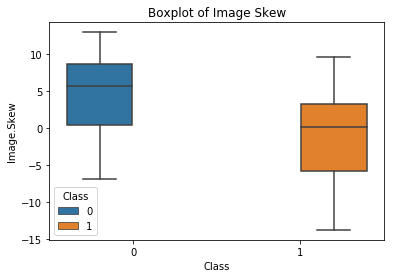

In [255]:
sns.boxplot(data=data, hue='Class', y='Image.Skew', x='Class') 
plt.title('Boxplot of Image Skew')

Text(0.5,1,'Boxplot of Image Curtosis')

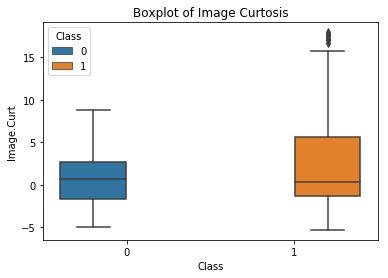

In [256]:
sns.boxplot(data=data, hue='Class', y='Image.Curt', x='Class') 
plt.title('Boxplot of Image Curtosis')

### 1(b)(iii) Select the first 200 rows of Class 0 and the first 200 rows of Class 1 as the test set and the rest of the data as the training set.
#### Test Data and Train Data Split

In [257]:
# Separating Test Data and Training Data

Class0 = data[data['Class'] == 0]
Class1 = data[data['Class'] == 1]

# X and Y Classes Separation by filtering the independent variable with respect to the labels

XClass0 = Class0.drop(labels='Class', axis=1)
XClass1 = Class1.drop(labels='Class', axis=1)
# YClass0 = Class0.drop(labels=['Image.Var','Image.Skew','Image.Curt','Entropy'], axis=1)
# YClass1 = Class1.drop(labels=['Image.Var','Image.Skew','Image.Curt','Entropy'], axis=1)
YClass0 = Class0.Class
YClass1 = Class1.Class

# Test Sets :

Xtest1 = XClass0.head(n=200)
#Xtest1 = XClass0.iloc[:200,:]
Xtest2 = XClass1.head(n=200)
frames = [Xtest1, Xtest2]
X_test = pd.concat(frames)
print('Size of X_test: ', X_test.shape)

Ytest1 = YClass0.head(n=200)
Ytest2 = YClass1.head(n=200)
frames = [Ytest1, Ytest2]
Y_test0 = pd.concat(frames)
Y_test = Y_test0.values.ravel()
print('Size of Y_test: ',Y_test.shape)

# Training Sets :

Xtrain1 = XClass0.iloc[200:,:]
Xtrain2 = XClass1.iloc[200:,:]
frames1 = [Xtrain1, Xtrain2]
X_train = pd.concat(frames1)
print('Size of X_train: ', X_train.shape)

Ytrain1 = YClass0.iloc[200:,]
Ytrain2 = YClass1.iloc[200:,]
frames1 = [Ytrain1, Ytrain2]
Y_train0 = pd.concat(frames1)
Y_train = Y_train0.values.ravel()
print('Size of Y_train: ', Y_train.shape)


Size of X_test:  (400, 4)
Size of Y_test:  (400,)
Size of X_train:  (972, 4)
Size of Y_train:  (972,)


### 1(c) Classification using KNN on Banknote authentication Dataset
### 1(c)(i) Write code for k-nearest neighbors with Euclidean metric (or use a software package).
### 1(c)(ii) Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of 1/k for k=(1,4,7,...901). You are welcome to use smaller increments of k. Which k is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision, and F- score when k = optimum k.


Taking 3 unit increments, the KNN Implementation is done as follows:

Most suitable k (Minimum): 1
Most suitable k (Maximum): 49
Best Test error: 0.0
Best Training error: 0.0


Text(0.5,1,'Error vs k')

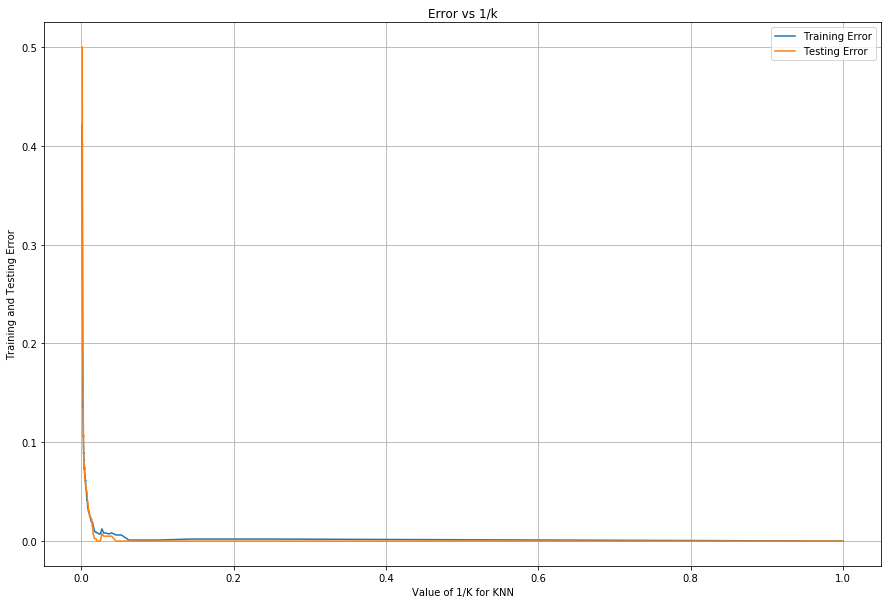

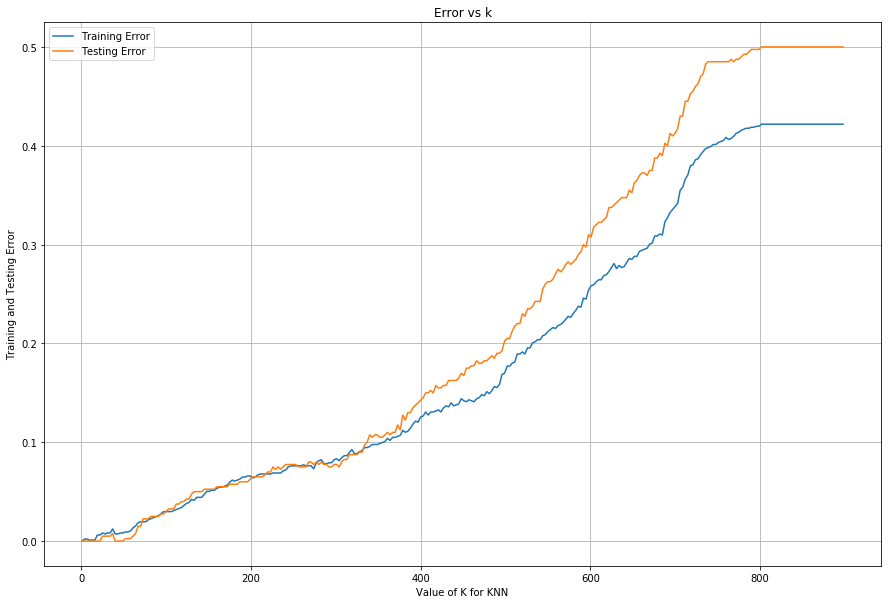

In [261]:
# KNN Implementation

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
k_range = list(range(1, 901, 3))
k1 = []
k2 = []
  
# list of scores from k_range
train_error = []
test_error = []
ts1 = 1
ts2 = 1

# looping through reasonable values of k
for k in k_range:
# Running KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, Y_train)
    pred_train = knn.predict(X_train)
    trainingscore = knn.score(X_train, Y_train)
    testscore = knn.score(X_test, Y_test)
    Y_pred = knn.predict(X_test)
    testerror = 1-testscore
    train_error.append(1-trainingscore)
    test_error.append(testerror)
    if testerror<ts1:
        ts1=testerror
        kMinimum=k
    if testerror<=ts2:
        ts2=testerror
        kMaximum=k
    k1.append(1/k)
    k2.append(k)

plt.figure(figsize=(15,10))
plt.plot(k1, train_error, label='Training Error')
plt.plot(k1, test_error, label='Testing Error')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Value of 1/K for KNN')
plt.ylabel('Training and Testing Error')
plt.title('Error vs 1/k')
print('Most suitable k (Minimum):', kMinimum)
print('Most suitable k (Maximum):', kMaximum)
print('Best Test error:',ts1)
print('Best Training error:', min(train_error))


plt.figure(figsize=(15,10))
plt.plot(k2, train_error, label='Training Error')
plt.plot(k2, test_error, label='Testing Error')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Value of K for KNN')
plt.ylabel('Training and Testing Error')
plt.title('Error vs k')

By printing the values of all test errors, I found a range of Optimal K for which we get the minimum test error. K has a range from k=1 to k=49. 
Taking into consideration the linearly separable data, I am assuming here the k to be the minimum value. 
So, the most suitable k among the values, Optimum k=1. 

### Calculating Confusion matrix, TPR, TNR, Precision and F-score for Optimum k

In [264]:
# Function to Plot Confusion Matrix

def plot_confusion_matrix(cm, name, normalize=False, cmap=plt.cm.Blues, title='Confusion Matrix'):                         

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.grid(False)
    plt.title(title+name)
    plt.colorbar()
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

[[200   0]
 [  0 200]]
Confusion matrix, without normalization


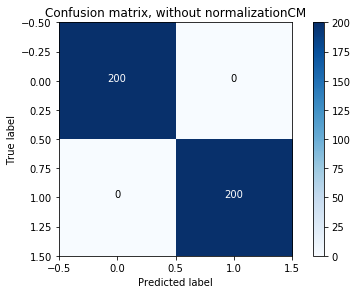

True Negative Rate: 1.0
True Positive Rate: 1.0
Precision: 1.0
F-score: 1.0


In [274]:
# Printing and Plotting Confusion Matrix and other Metrics

knn = KNeighborsClassifier(n_neighbors=kMinimum, metric='euclidean')
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
plot_confusion_matrix(cm, title='Confusion matrix, without normalization',name= 'CM')

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
Precision = TP/(TP+FP)
Fscore = 2*TP/(2*TP+FP+FN)

print('True Negative Rate:', TNR)
print('True Positive Rate:', TPR)
print('Precision:', Precision)
print('F-score:', Fscore)

Thus, for the above optimum k, the values of Metrics are:
Precision : 1.0 
TPR: 1.0
TNR: 1.0
F-score: 1.0

### 1(c)(iii) Since the computation time depends on the size of the training set, one mayonly use a subset of the training set. Plot the best error rate, which is obtainedby some value of k, against the size of training set, when the size of trainingset is N = (50, 100, 150...900). Note: for each N, select your training set by choosing the first N/2 rows of Class 0 and the first N/2 rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 40. For example, if N = 250, the optimal k is selected from (1, 41, 81...241g. This plot is called a Learning Curve.
#### Learning Curve Plot

Text(0.5,1,'Best Error Rate vs Size of Training Set')

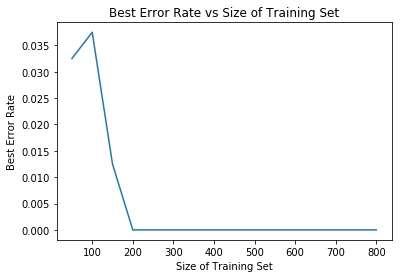

In [159]:
# Initializing Data 
N = list(range(50,850,50))
kBest = []
for n in N:
#     Finding the new Training set from the Training set created before
    error = []
    newXtrain1 = Xtrain1.iloc[:int(n/2),:]
    newXtrain2 = Xtrain2.iloc[:int(n/2),:]
    frame = [newXtrain1, newXtrain2]
    NewX_train = pd.concat(frame)
    
    newYtrain1 = Ytrain1.iloc[:int(n/2),]
    newYtrain2 = Ytrain2.iloc[:int(n/2),]
    frame = [newYtrain1, newYtrain2]
    NewY_train = pd.concat(frame)
    
#     Looping for said values of k
    for k in range (1, n ,40):
        knn = KNeighborsClassifier(metric='euclidean', n_neighbors=k)
        knn.fit(NewX_train, NewY_train)
        testscore = knn.score(X_test, Y_test)
        error.append(1-testscore) 
    kBest.append(min(error))
    
plt.plot(N, kBest)
plt.xlabel('Size of Training Set')
plt.ylabel('Best Error Rate')
plt.title('Best Error Rate vs Size of Training Set')

### 1(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e. , when k = optimum k) in a table. Use all of your training data and select the best k when k =(1,11,21....901).

### 1(d)(i) Minkowski Distance: 
###     A. which becomes Manhattan Distance with p = 1.
###     B. with log10(p) = (0.1, 0.2, 0.3....1). In this case, use the optimum k you found for the Manhattan distance in 1(d)(i) A. What is the best log10(p)?
###     C. Which becomes Chebyshev Distance with p tends to infinity.

#### Note: For the below KNN Metrics, I am calculating the optimum K as the Maximum K from the range of K for which we get the best error rate. 

In [268]:
# KNN with different Metrics

k_range = list(range(1, 901, 10))
train_error = []
test_error = []
ts1 = 1
ts2 = 1
# Manhattan Distance

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    knn.fit(X_train, Y_train)
    trainingscore = knn.score(X_train, Y_train)
    testscore = knn.score(X_test, Y_test)
    testerror = 1-testscore
    train_error.append(1-trainingscore)
    test_error.append(testerror)
    if testerror<=ts1:
        ts1=testerror
        kOptimumMa=k
print('Optimum k for Manhattan Distance:', kOptimumMa)
print('Best Test error:',ts1)

# Chebyshev Distance
ts1 = 1
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=math.inf)
    knn.fit(X_train, Y_train)
    trainingscore = knn.score(X_train, Y_train)
    testscore = knn.score(X_test, Y_test)
    testerror = 1-testscore
    train_error.append(1-trainingscore)
    test_error.append(testerror)
    if testerror<=ts1:
        ts1=testerror
        kOptimumC=k
print('Optimum k for Chebyshev Distance:', kOptimumC)
print('Best Test error:',ts1)


Optimum k for Manhattan Distance: 11
Best Test error: 0.0
Optimum k for Chebyshev Distance: 11
Best Test error: 0.0


#### Using optimum k for Manhattan Distance with log10(p)=(0.1,0.2,0.3....1)

In [269]:
# Defining function for Calculating Miskowski Distance to be able to pass in knn function

def dist(a,b,**kwargs):
    x = kwargs["t"]
    D = np.sum(abs(np.subtract(a,b)) ** x)** (1/x)
    return (D)

In [270]:
# Implementing KNN with the custom defined metrics
ts1 = 1
for logp in np.arange(.1, 1.1, .1):
    p = 10**logp
    #print(p)
    knn = KNeighborsClassifier(n_neighbors= kOptimumMa, metric=dist, metric_params={'t':p})
    knn.fit(X_train, Y_train)
    testscore = knn.score(X_test, Y_test)
    testerror = 1-testscore
    test_error.append(testerror)
    if testerror<=ts1:
        ts1=testerror
        pOptimum=logp
print('Best Test error:',ts1)
print('Best log10p:', pOptimum)


Best Test error: 0.0
Best log10p: 1.0


### 1(d)(ii) Mahalanobis Distance:

In [271]:
# Mahalanobis Distance

k_range = list(range(1, 901, 10))
train_error = []
test_error = []
ts1=1

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': np.cov(X_train)})
    knn.fit(X_train, Y_train)
    pred_train = knn.predict(X_train)
    trainingscore = knn.score(X_train, Y_train)
    testscore = knn.score(X_test, Y_test)
    testerror = 1-testscore
    train_error.append(1-trainingscore)
    test_error.append(testerror)
    if testerror<=ts1:
        ts1=testerror
        kOptimumMaha=k
print('Optimum k for Mahalanobis Distance:', kOptimumMaha)
print('Best Test error:',ts1)

Optimum k for Mahalanobis Distance: 11
Best Test error: 0.0


### 1. (e) The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k=(1,11,21...901).

In [272]:
# KNN for weighted decision by distance instead of majority polling. 

k_range = list(range(1, 901, 10))
train_error = []
test_error = []

# Euclidean Distance
ts1 = 1

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, Y_train)
    pred_train = knn.predict(X_train)
    trainingscore = knn.score(X_train, Y_train)
    testscore = knn.score(X_test, Y_test)
    testerror = 1-testscore
    train_error.append(1-trainingscore)
    test_error.append(testerror)
    if testerror<=ts1:
        ts1=testerror
        WkOptimum=k
print('Optimum k for Weighted KNN Euclidean Distance:', WkOptimum)
print('Best Test error:',ts1)

# Manhattan Distance
ts1 = 1
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=1, weights='distance')
    knn.fit(X_train, Y_train)
    pred_train = knn.predict(X_train)
    trainingscore = knn.score(X_train, Y_train)
    testscore = knn.score(X_test, Y_test)
    testerror = 1-testscore
    train_error.append(1-trainingscore)
    test_error.append(testerror)
    if testerror<=ts1:
        ts1=testerror
        WkOptimumMa=k
print('Optimum k for Weighted KNN Manhattan Distance:', WkOptimumMa)
print('Best Test error:',ts1)

# Chebyshev Distance
ts1 = 1
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=math.inf, weights='distance')
    knn.fit(X_train, Y_train)
    pred_train = knn.predict(X_train)
    trainingscore = knn.score(X_train, Y_train)
    testscore = knn.score(X_test, Y_test)
    testerror = 1-testscore
    train_error.append(1-trainingscore)
    test_error.append(testerror)
    if testerror<=ts1:
        ts1=testerror
        WkOptimumC=k
print('Optimum k for Weighted KNN Chebyshev Distance:', WkOptimumC)
print('Best Test error:',ts1)


Optimum k for Weighted KNN Euclidean Distance: 71
Best Test error: 0.0
Optimum k for Weighted KNN Manhattan Distance: 61
Best Test error: 0.0
Optimum k for Weighted KNN Chebyshev Distance: 81
Best Test error: 0.0


### 1.(f) What is the lowest training error rate you achieved in this exercise?

#### The lowest training error rate observed in this excercise is 0.0